In [13]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from model_comparer import ModelComparer
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
from plotting_utils import fig_saver
import gas_phase_data


In [15]:
import sys
sys.path.append("../")
import surp
from surp.model_scripts import multizone_sim

In [16]:
import vice

In [40]:
cd ~/surp

/home/daniel/surp


In [29]:
multizone_sim

<module 'surp.model_scripts.multizone_sim' from '/home/daniel/surp/../surp/model_scripts/multizone_sim.py'>

In [39]:
vice.output("../output/fiducial")

OSError: Could not unpickle file: n.obj

In [38]:
cd ~/surp/model_scripts/

/home/daniel/surp/model_scripts


In [7]:
o = vice.output("output/fiducial")

In [12]:
o.zones["zone1"].history

vice.dataframe{
    time -----------> [0, 0.1, 0.2, ... , 13, 13.1, 13.2]
    mgas -----------> [1e-12, 1.87249e+06, 3.64472e+06, ... , 1.22537e+07, 1.20841e+07, 1.19164e+07]
    mstar ----------> [0, 213228, 408849, ... , 7.70314e+07, 7.73236e+07, 7.76102e+07]
    sfr ------------> [0, 0.00278109, 0.00533254, ... , 0.00597608, 0.00587299, 0.00577166]
    ifr ------------> [nan, 0.0216359, 0.0226549, ... , 0.0016154, 0.00144608, 0.00141429]
    ofr ------------> [7.1995e+244, 0.000129845, 0.000248969, ... , 0.000279015, 0.000274202, 0.000269471]
    eta_0 ----------> [0.0466886, 0.0466886, 0.0466886, ... , 0.0466886, 0.0466886, 0.0466886]
    r_eff ----------> [nan, 0.233294, 0.233294, ... , 0.502788, 0.50241, 0.50342]
    z_in(fe) -------> [0, 0, 0, ... , 0, 0, 0]
    z_in(o) --------> [0, 0, 0, ... , 0, 0, 0]
    z_in(n) --------> [0, 0, 0, ... , 0, 0, 0]
    z_in(au) -------> [0, 0, 0, ... , 0, 0, 0]
    z_in(ag) -------> [0, 0, 0, ... , 0, 0, 0]
    z_out(fe) ------> [0, 0.00015070

In [22]:
cd ~/surp

/home/daniel/surp


In [23]:
# mc = ModelComparer(["cristallo11", "cristallo11_reduced_eta_n", "cristallo11_lc18"])
mc = ModelComparer(["k10"])

# Mean abundance star tracks

saving


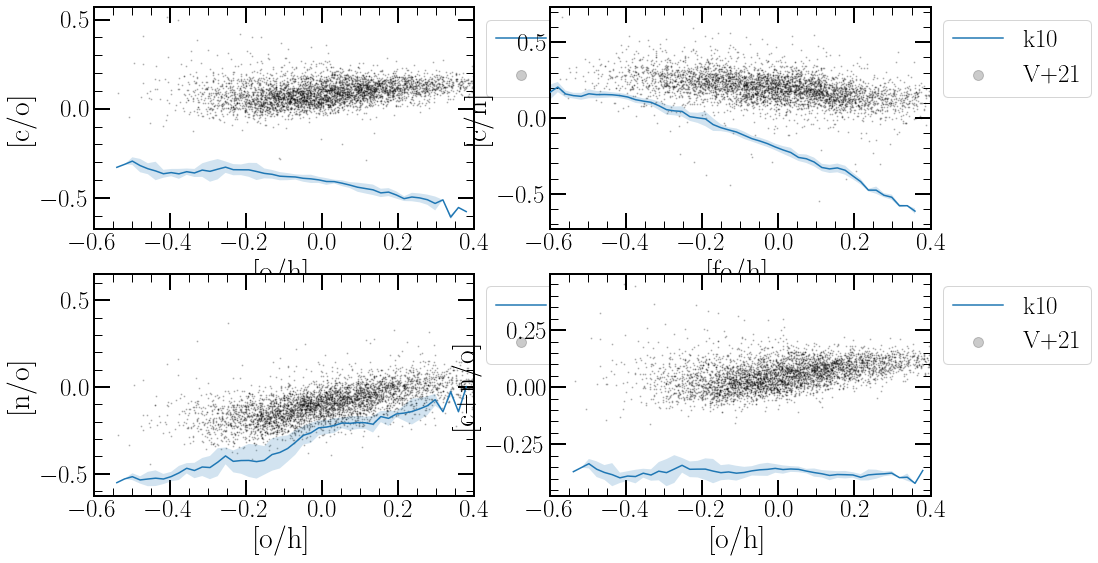

In [24]:
mc.plot_all_mean_stars(filename="stars_eta")

# Gas phase tracks

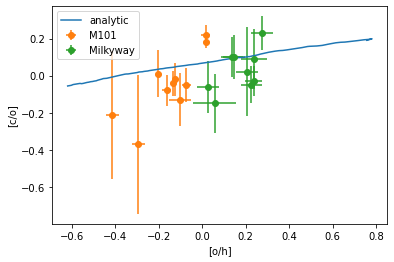

In [16]:
mc.plot_gas("[o/h]", "[c/o]")
# mc.plot_gas("[fe/h]", "[c/n]")

# MDFs

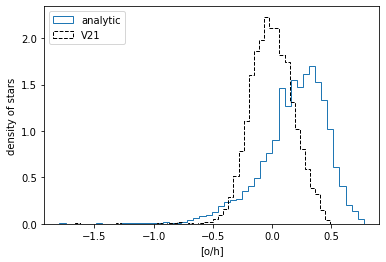

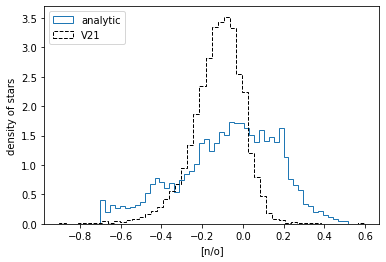

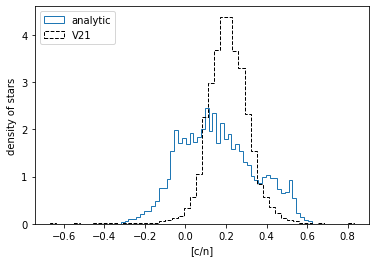

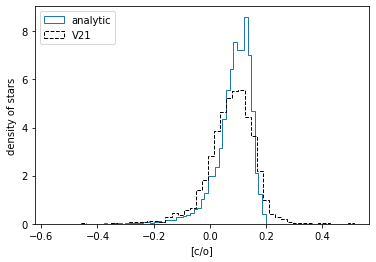

In [17]:
mc.plot_mdf("[o/h]")
mc.plot_mdf("[n/o]")
mc.plot_mdf("[c/n]")
mc.plot_mdf("[c/o]")

# Stars

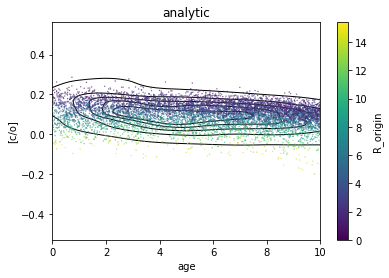

In [18]:
mc.plot_stars("age", "[c/o]", c="R_origin", xlim=(0, 10))

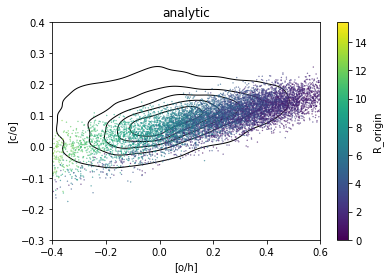

In [21]:
mc.plot_stars("[o/h]", "[c/o]", c="R_origin", xlim=(-0.4, 0.6), ylim=(-0.3, 0.4))

# Gas phase tracks

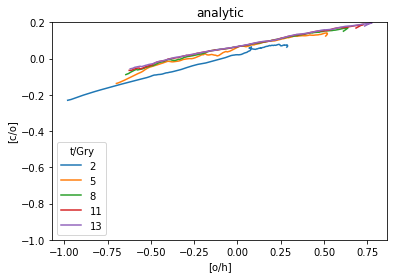

In [24]:
mc.plot_model_fixed_t(ylim=(-1, 0.2))

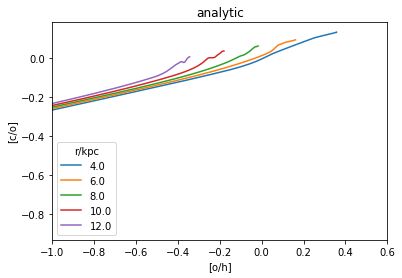

In [25]:
mc.plot_model_fixed_r()
